In [1]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
file_path = 'C:/Users/tulio/OneDrive/Desktop/mxmh_survey_results.csv'
data = pd.read_csv(file_path)

# Exibindo as primeiras linhas do dataset para entender sua estrutura
print(data.head())
print(data.info())


            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

Explicação: Esse bloco carrega as bibliotecas principais para análise de dados, machine learning e visualização, além de carregar o dataset e exibir sua estrutura.

In [2]:
# Limpeza de dados: removendo valores nulos e duplicatas
data = data.dropna()
data = data.drop_duplicates()

# Normalização de colunas numéricas
scaler = StandardScaler()
data[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Hours per day']] = scaler.fit_transform(data[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Hours per day']])

# Estatísticas descritivas básicas
print(data.describe())


              Age  Hours per day           BPM       Anxiety    Depression  \
count  616.000000   6.160000e+02  6.160000e+02  6.160000e+02  6.160000e+02   
mean    24.792208   6.632501e-17  1.623500e+06  1.211152e-16 -5.767392e-17   
std     11.658515   1.000813e+00  4.029114e+07  1.000813e+00  1.000813e+00   
min     10.000000  -1.206214e+00  0.000000e+00 -2.134929e+00 -1.633906e+00   
25%     18.000000  -5.546355e-01  1.000000e+02 -6.835661e-01 -9.662535e-01   
50%     21.000000  -2.288460e-01  1.200000e+02  4.211545e-02  3.522517e-02   
75%     27.000000   4.227330e-01  1.440000e+02  7.677970e-01  7.028776e-01   
max     89.000000   6.612733e+00  1.000000e+09  1.493479e+00  1.704356e+00   

           Insomnia           OCD  
count  6.160000e+02  6.160000e+02  
mean  -4.613914e-17 -2.018587e-17  
std    1.000813e+00  1.000813e+00  
min   -1.222448e+00 -9.313917e-01  
25%   -9.008476e-01 -9.313917e-01  
50%   -2.576461e-01 -2.308578e-01  
75%    7.071562e-01  8.199431e-01  
max    1.

Explicação: Aqui, valores nulos e duplicados são removidos, e as colunas numéricas relacionadas à saúde mental e horas de escuta de música são normalizadas para evitar disparidades entre as escalas. O bloco também exibe estatísticas descritivas.

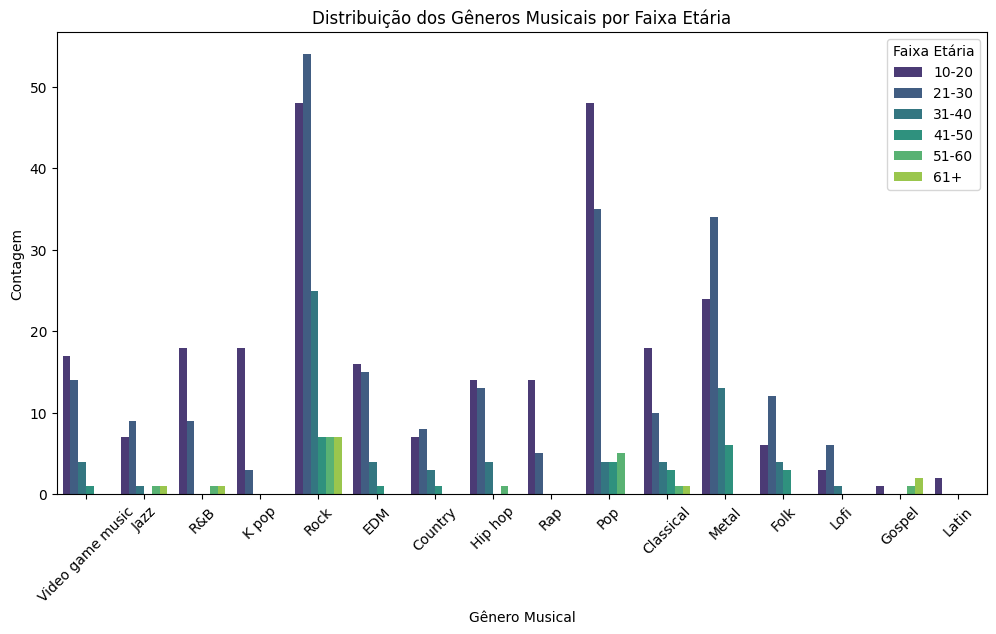

In [3]:
# Agrupamento por faixa etária
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Gráfico de barras para distribuição de gêneros musicais por faixa etária
plt.figure(figsize=(12, 6))
sns.countplot(x='Fav genre', hue='Age Group', data=data, palette='viridis')
plt.title('Distribuição dos Gêneros Musicais por Faixa Etária')
plt.xlabel('Gênero Musical')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Faixa Etária')
plt.show()


Esse bloco agrupa os dados em faixas etárias e exibe um gráfico de barras para analisar a distribuição de gêneros musicais favoritos por faixa etária.

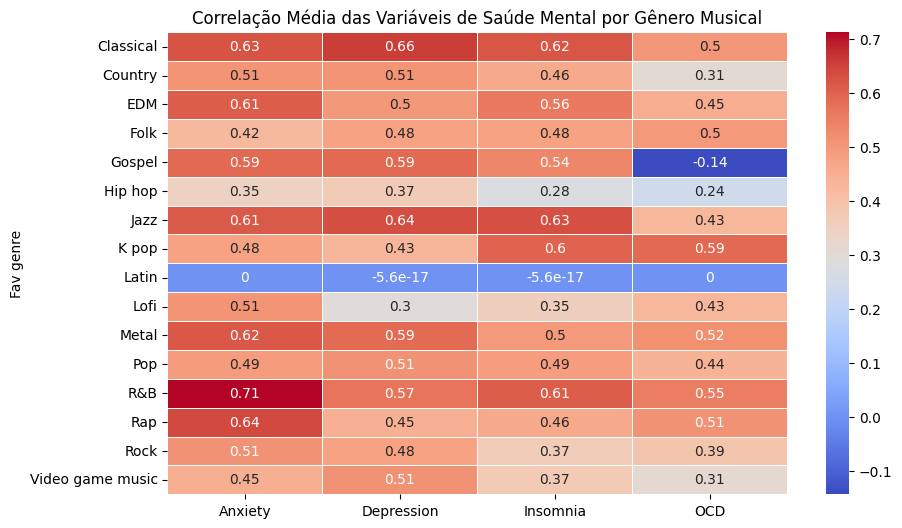

In [4]:
# Calculando a correlação para cada gênero musical
genre_corr = data.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

# Usando unstack() para reorganizar o DataFrame e calcular a média das correlações para todos os gêneros
mean_corr = genre_corr.groupby(level=0).mean()

# Exibindo o Heatmap para correlação média
plt.figure(figsize=(10, 6))
sns.heatmap(mean_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação Média das Variáveis de Saúde Mental por Gênero Musical')
plt.show()


Este bloco calcula a correlação entre as variáveis de saúde mental para cada gênero musical e plota um heatmap para facilitar a visualização dessas correlações.

In [5]:
# Separando por faixa etária
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Contagem de pessoas por faixa etária
age_group_counts = data['Age Group'].value_counts().sort_index()

# Porcentagem de pessoas por faixa etária
age_group_percentage = (age_group_counts / len(data)) * 100

# Médias de horas por dia que escutam música por faixa etária
age_group_hours_mean = data.groupby('Age Group')['Hours per day'].mean()

# Exibindo os resultados
age_group_df = pd.DataFrame({
    'Quantidade': age_group_counts,
    'Porcentagem (%)': age_group_percentage,
    'Média de horas por dia': age_group_hours_mean
})

print(age_group_df)


           Quantidade  Porcentagem (%)  Média de horas por dia
Age Group                                                     
10-19             261        42.370130                0.120036
20-29             227        36.850649               -0.046289
30-39              67        10.876623               -0.205749
40-49              26         4.220779               -0.351017
50-59              17         2.759740               -0.085115
60-69              12         1.948052               -0.160973
70-79               4         0.649351               -0.228846


C:\Users\tulio\AppData\Local\Temp\ipykernel_20208\1391213995.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_hours_mean = data.groupby('Age Group')['Hours per day'].mean()


Este bloco agrupa os dados por faixas etárias, calcula a quantidade e porcentagem de pessoas em cada faixa e a média de horas que elas ouvem música por dia. Os resultados são exibidos em formato de tabela.

In [6]:
# Função para classificar a severidade da doença
def classify_severity(value):
    if value <= 0.33:
        return 'Leve'
    elif 0.33 < value <= 0.66:
        return 'Moderado'
    else:
        return 'Severo'

# Aplicando a classificação para todas as colunas de saúde mental
for col in ['Anxiety', 'Depression', 'Insomnia', 'OCD']:
    data[col + '_Severity'] = data[col].apply(classify_severity)

# Exibindo a contagem para a severidade de "Anxiety" como exemplo
print(data['Anxiety_Severity'].value_counts())


Anxiety_Severity
Leve        314
Severo      201
Moderado    101
Name: count, dtype: int64


Aqui, as variáveis relacionadas à saúde mental são classificadas em "Leve", "Moderado" e "Severo" com base nos valores normalizados.

In [7]:
# Contagem de pessoas por plataforma de streaming
streaming_counts = data['Primary streaming service'].value_counts()

# Porcentagem de pessoas por plataforma de streaming
streaming_percentage = (streaming_counts / len(data)) * 100

# Exibindo os resultados
streaming_df = pd.DataFrame({
    'Quantidade': streaming_counts,
    'Porcentagem (%)': streaming_percentage
})

print(streaming_df)


                                   Quantidade  Porcentagem (%)
Primary streaming service                                     
Spotify                                   396        64.285714
YouTube Music                              73        11.850649
I do not use a streaming service.          56         9.090909
Apple Music                                42         6.818182
Other streaming service                    40         6.493506
Pandora                                     9         1.461039


Este bloco calcula a quantidade e porcentagem de pessoas que usam diferentes plataformas de streaming para ouvir música.

In [8]:
# Efeito da música no geral
effect_counts = data['Music effects'].value_counts()
effect_percentage = (effect_counts / len(data)) * 100

# Separando "No effect" ou "Worsen"
no_effect_or_worsen = effect_counts['No effect'] + effect_counts['Worsen']
no_effect_or_worsen_percentage = (no_effect_or_worsen / len(data)) * 100

# Exibindo os resultados
print('Efeito geral da música (em porcentagem):')
print(effect_percentage)
print(f'Porcentagem de "No effect" ou "Worsen": {no_effect_or_worsen_percentage:.2f}%')


Efeito geral da música (em porcentagem):
Music effects
Improve      75.487013
No effect    22.077922
Worsen        2.435065
Name: count, dtype: float64
Porcentagem de "No effect" ou "Worsen": 24.51%


Aqui, os dados sobre o impacto da música na saúde mental são analisados, separando aqueles que reportaram "nenhum efeito" ou "piora" no estado emocional.

In [9]:
# Filtrando os dados onde 'While working' tem valores específicos
work_data = data[data['While working'] == 'Yes']

# Contagem dos efeitos da música para quem escuta música no trabalho
work_effect_counts = work_data['Music effects'].value_counts()
work_effect_percentage = (work_effect_counts / len(work_data)) * 100

# Separando "No effect" ou "Worsen" no trabalho
work_no_effect_or_worsen = work_effect_counts.get('No effect', 0) + work_effect_counts.get('Worsen', 0)
work_no_effect_or_worsen_percentage = (work_no_effect_or_worsen / len(work_data)) * 100

# Exibindo os resultados
print('Efeito da música no trabalho (em porcentagem):')
print(work_effect_percentage)
print(f'Porcentagem de "No effect" ou "Worsen": {work_no_effect_or_worsen_percentage:.2f}%')


# Filtrando os dados para quem é Instrumentista
instrument_data = data[data['Instrumentalist'] == 'Yes']

# Contagem dos efeitos da música para quem toca instrumentos
instrument_effect_counts = instrument_data['Music effects'].value_counts()
instrument_effect_percentage = (instrument_effect_counts / len(instrument_data)) * 100

# Separando "No effect" ou "Worsen" para quem toca instrumentos
instrument_no_effect_or_worsen = instrument_effect_counts.get('No effect', 0) + instrument_effect_counts.get('Worsen', 0)
instrument_no_effect_or_worsen_percentage = (instrument_no_effect_or_worsen / len(instrument_data)) * 100

# Exibindo os resultados
print('Efeito da música para quem toca instrumentos (em porcentagem):')
print(instrument_effect_percentage)
print(f'Porcentagem de "No effect" ou "Worsen": {instrument_no_effect_or_worsen_percentage:.2f}%')

# Filtrando os dados para quem é Compositor
composer_data = data[data['Composer'] == 'Yes']

# Contagem dos efeitos da música para quem compõe música
composer_effect_counts = composer_data['Music effects'].value_counts()
composer_effect_percentage = (composer_effect_counts / len(composer_data)) * 100

# Separando "No effect" ou "Worsen" para quem compõe
composer_no_effect_or_worsen = composer_effect_counts.get('No effect', 0) + composer_effect_counts.get('Worsen', 0)
composer_no_effect_or_worsen_percentage = (composer_no_effect_or_worsen / len(composer_data)) * 100

# Exibindo os resultados
print('Efeito da música para quem compõe (em porcentagem):')
print(composer_effect_percentage)
print(f'Porcentagem de "No effect" ou "Worsen": {composer_no_effect_or_worsen_percentage:.2f}%')


Efeito da música no trabalho (em porcentagem):
Music effects
Improve      78.775510
No effect    19.183673
Worsen        2.040816
Name: count, dtype: float64
Porcentagem de "No effect" ou "Worsen": 21.22%
Efeito da música para quem toca instrumentos (em porcentagem):
Music effects
Improve      81.5
No effect    16.5
Worsen        2.0
Name: count, dtype: float64
Porcentagem de "No effect" ou "Worsen": 18.50%
Efeito da música para quem compõe (em porcentagem):
Music effects
Improve      83.333333
No effect    14.814815
Worsen        1.851852
Name: count, dtype: float64
Porcentagem de "No effect" ou "Worsen": 16.67%


Esses dois blocos analisam o efeito da música no trabalho e para pessoas que tocam instrumentos, separando os que relataram "nenhum efeito" ou "piora"

C:\Users\tulio\AppData\Local\Temp\ipykernel_20208\1402312503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fav_genre_counts.index, y=fav_genre_counts.values, palette="Blues_d")


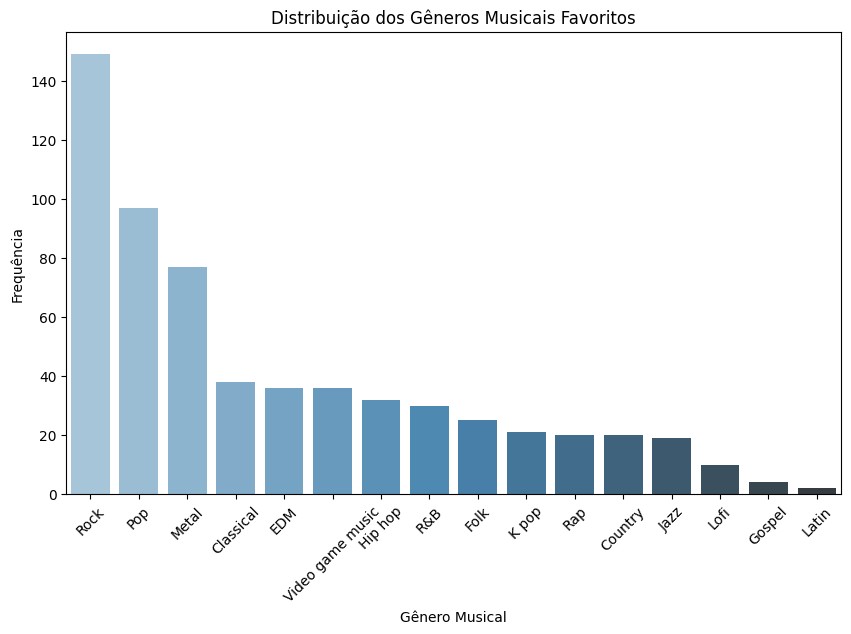

In [10]:
# Contagem de gêneros musicais favoritos
fav_genre_counts = data['Fav genre'].value_counts()

# Exibindo a distribuição dos gêneros musicais favoritos
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genre_counts.index, y=fav_genre_counts.values, palette="Blues_d")
plt.title('Distribuição dos Gêneros Musicais Favoritos')
plt.xlabel('Gênero Musical')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

Correlação de Pearson entre 'Hours per day' e variáveis de saúde mental:
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.036945    0.085559  0.119036  0.108197
Anxiety             0.036945  1.000000    0.527950  0.275013  0.339262
Depression          0.085559  0.527950    1.000000  0.372675  0.158990
Insomnia            0.119036  0.275013    0.372675  1.000000  0.198866
OCD                 0.108197  0.339262    0.158990  0.198866  1.000000


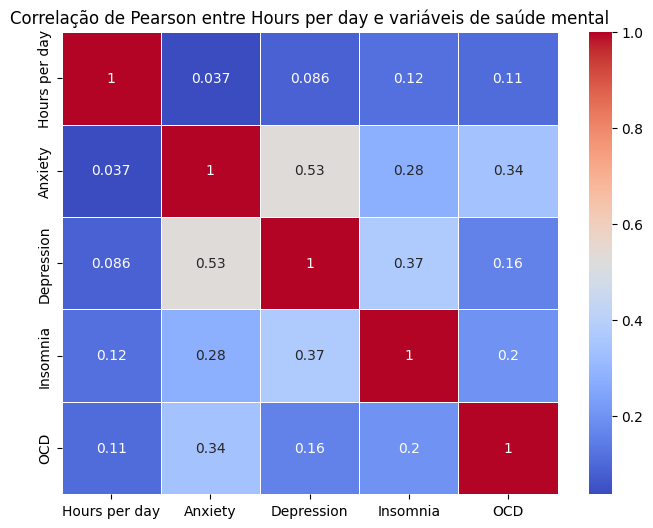

In [11]:
# Selecionando as variáveis de interesse
health_vars = ['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Calculando a correlação de Pearson
correlation_matrix = data[health_vars].corr(method='pearson')

# Exibindo a matriz de correlação
print("Correlação de Pearson entre 'Hours per day' e variáveis de saúde mental:")
print(correlation_matrix)

# Visualizando a correlação com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação de Pearson entre Hours per day e variáveis de saúde mental')
plt.show()

Correlação de Pearson para o gênero musical: Video game music
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.084946    0.237414  0.151767  0.131535
Anxiety             0.084946  1.000000    0.433569  0.116160  0.247305
Depression          0.237414  0.433569    1.000000  0.495926  0.122055
Insomnia            0.151767  0.116160    0.495926  1.000000 -0.113944
OCD                 0.131535  0.247305    0.122055 -0.113944  1.000000


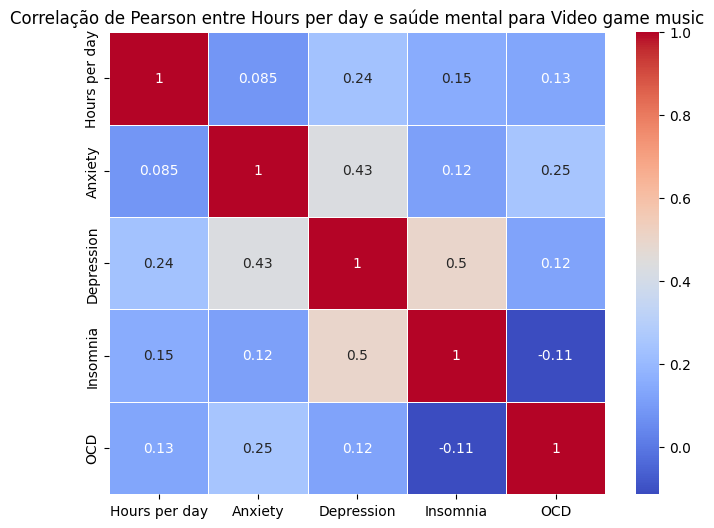

Correlação de Pearson para o gênero musical: Jazz
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000 -0.009618    0.033931  0.415658  0.303259
Anxiety            -0.009618  1.000000    0.756383  0.509336  0.183935
Depression          0.033931  0.756383    1.000000  0.630683  0.153476
Insomnia            0.415658  0.509336    0.630683  1.000000  0.384820
OCD                 0.303259  0.183935    0.153476  0.384820  1.000000


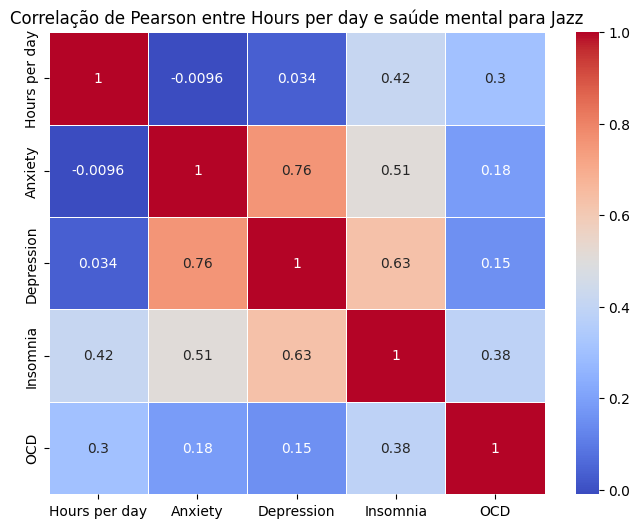

Correlação de Pearson para o gênero musical: R&B
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.310133    0.101593  0.046889  0.344737
Anxiety             0.310133  1.000000    0.649333  0.603864  0.595969
Depression          0.101593  0.649333    1.000000  0.432258  0.205251
Insomnia            0.046889  0.603864    0.432258  1.000000  0.408871
OCD                 0.344737  0.595969    0.205251  0.408871  1.000000


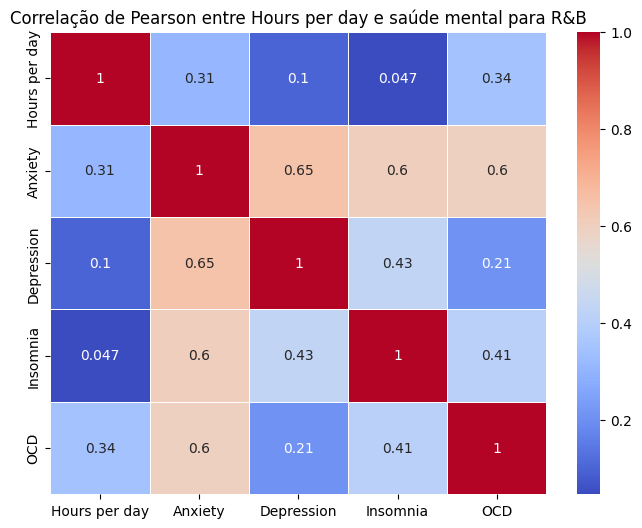

Correlação de Pearson para o gênero musical: K pop
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.119526    0.152907 -0.053658  0.312072
Anxiety             0.119526  1.000000    0.115088  0.331977  0.467829
Depression          0.152907  0.115088    1.000000  0.395872  0.219431
Insomnia           -0.053658  0.331977    0.395872  1.000000  0.673099
OCD                 0.312072  0.467829    0.219431  0.673099  1.000000


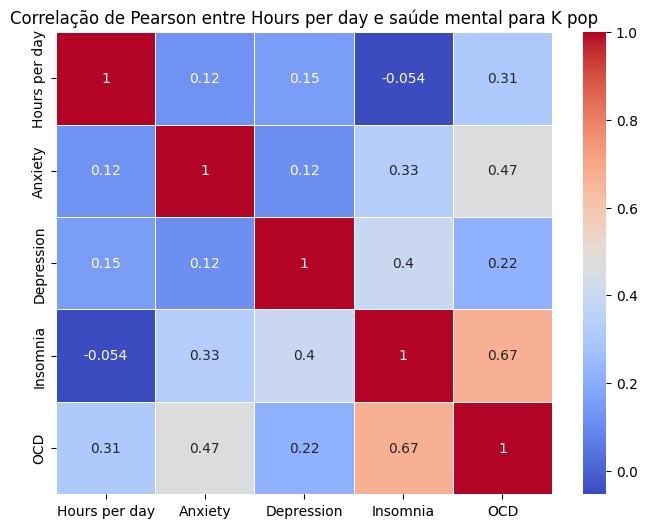

Correlação de Pearson para o gênero musical: Rock
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.036752   -0.000346  0.127961  0.104889
Anxiety             0.036752  1.000000    0.589361  0.180522  0.288805
Depression         -0.000346  0.589361    1.000000  0.172273  0.157144
Insomnia            0.127961  0.180522    0.172273  1.000000  0.109940
OCD                 0.104889  0.288805    0.157144  0.109940  1.000000


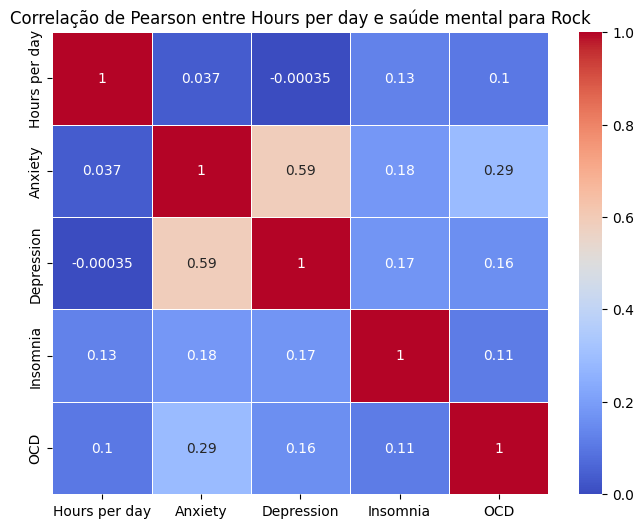

Correlação de Pearson para o gênero musical: EDM
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.259244    0.352392  0.364616  0.290034
Anxiety             0.259244  1.000000    0.506735  0.440963  0.497341
Depression          0.352392  0.506735    1.000000  0.486768  0.004357
Insomnia            0.364616  0.440963    0.486768  1.000000  0.308940
OCD                 0.290034  0.497341    0.004357  0.308940  1.000000


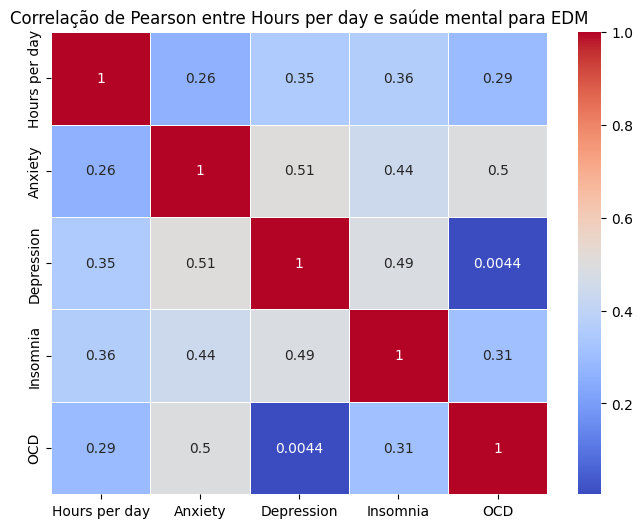

Correlação de Pearson para o gênero musical: Country
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.141884    0.318104  0.299829  0.342840
Anxiety             0.141884  1.000000    0.489927  0.472557  0.072555
Depression          0.318104  0.489927    1.000000  0.387500  0.169086
Insomnia            0.299829  0.472557    0.387500  1.000000 -0.012527
OCD                 0.342840  0.072555    0.169086 -0.012527  1.000000


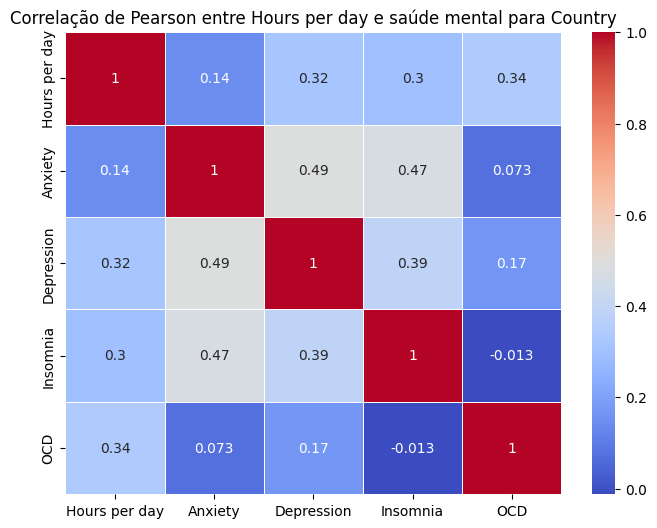

Correlação de Pearson para o gênero musical: Hip hop
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000 -0.022629    0.383677  0.445824 -0.164018
Anxiety            -0.022629  1.000000    0.370190 -0.082725  0.103909
Depression          0.383677  0.370190    1.000000  0.213998 -0.101752
Insomnia            0.445824 -0.082725    0.213998  1.000000 -0.025674
OCD                -0.164018  0.103909   -0.101752 -0.025674  1.000000


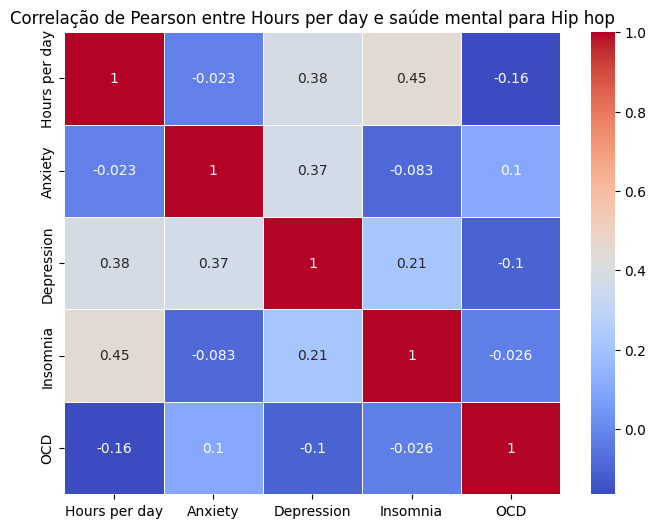

Correlação de Pearson para o gênero musical: Rap
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000 -0.163627   -0.194828 -0.409684 -0.120578
Anxiety            -0.163627  1.000000    0.650668  0.346286  0.562023
Depression         -0.194828  0.650668    1.000000  0.076029  0.061822
Insomnia           -0.409684  0.346286    0.076029  1.000000  0.426194
OCD                -0.120578  0.562023    0.061822  0.426194  1.000000


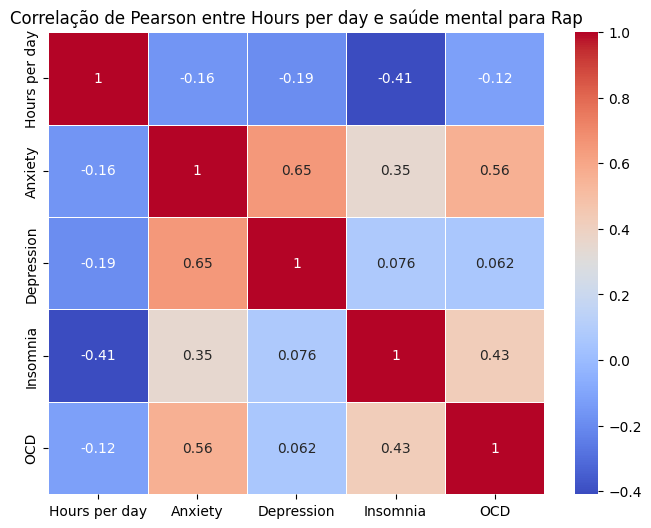

Correlação de Pearson para o gênero musical: Pop
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.063545    0.095124  0.065796  0.087235
Anxiety             0.063545  1.000000    0.402582  0.214758  0.357094
Depression          0.095124  0.402582    1.000000  0.498126  0.158431
Insomnia            0.065796  0.214758    0.498126  1.000000  0.249337
OCD                 0.087235  0.357094    0.158431  0.249337  1.000000


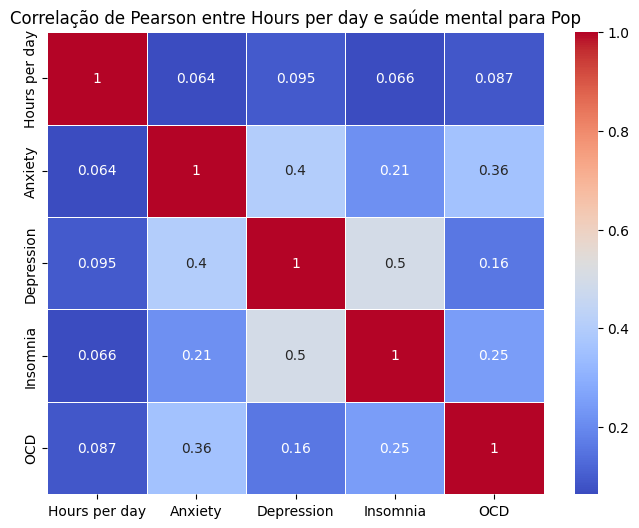

Correlação de Pearson para o gênero musical: Classical
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.040250    0.187672  0.374739  0.158374
Anxiety             0.040250  1.000000    0.683581  0.521734  0.296145
Depression          0.187672  0.683581    1.000000  0.597460  0.348794
Insomnia            0.374739  0.521734    0.597460  1.000000  0.365573
OCD                 0.158374  0.296145    0.348794  0.365573  1.000000


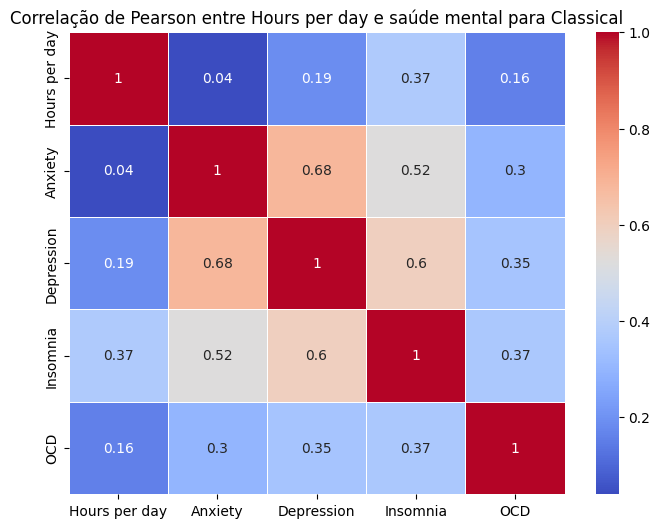

Correlação de Pearson para o gênero musical: Metal
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.086219    0.093870  0.024136  0.016033
Anxiety             0.086219  1.000000    0.652971  0.374213  0.436337
Depression          0.093870  0.652971    1.000000  0.339964  0.356637
Insomnia            0.024136  0.374213    0.339964  1.000000  0.272308
OCD                 0.016033  0.436337    0.356637  0.272308  1.000000


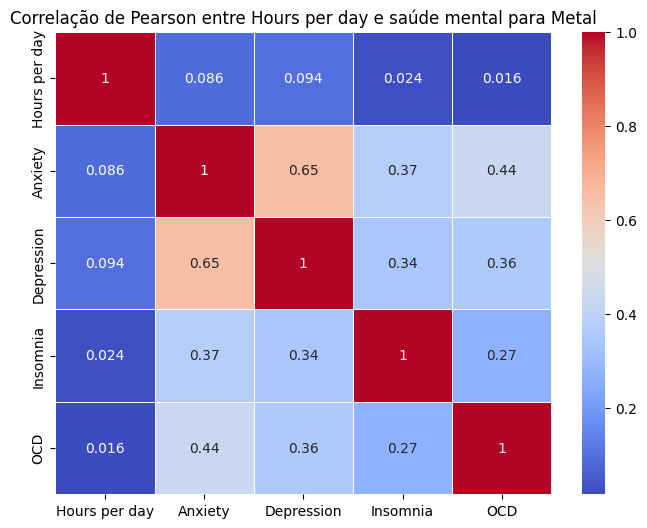

Correlação de Pearson para o gênero musical: Folk
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.073939    0.234097  0.207113  0.135706
Anxiety             0.073939  1.000000    0.130996  0.106480  0.460273
Depression          0.234097  0.130996    1.000000  0.539837  0.252883
Insomnia            0.207113  0.106480    0.539837  1.000000  0.274741
OCD                 0.135706  0.460273    0.252883  0.274741  1.000000


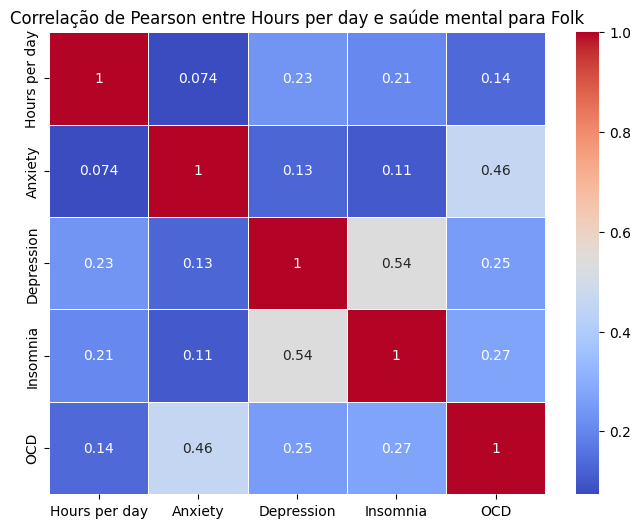

Correlação de Pearson para o gênero musical: Lofi
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000 -0.132489   -0.396628  0.414496  0.197853
Anxiety            -0.132489  1.000000    0.317385  0.141651  0.583753
Depression         -0.396628  0.317385    1.000000  0.004526 -0.135977
Insomnia            0.414496  0.141651    0.004526  1.000000  0.273805
OCD                 0.197853  0.583753   -0.135977  0.273805  1.000000


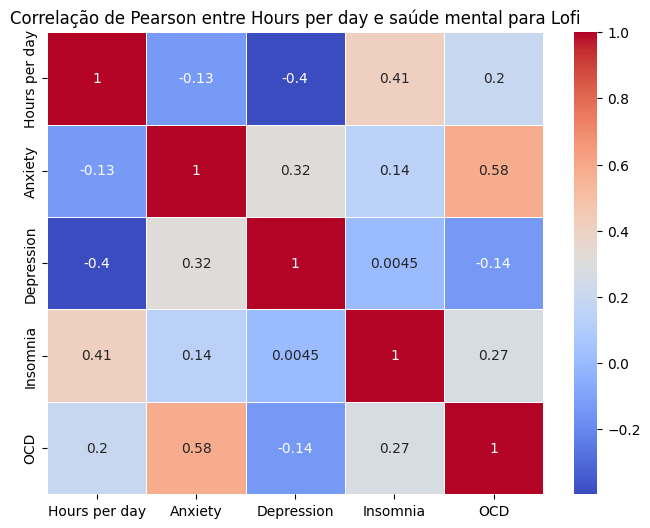

Correlação de Pearson para o gênero musical: Gospel
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000 -0.612146   -0.605861 -0.631169  0.989100
Anxiety            -0.612146  1.000000    0.999548  0.870388 -0.502519
Depression         -0.605861  0.999548    1.000000  0.855186 -0.493742
Insomnia           -0.631169  0.870388    0.855186  1.000000 -0.577350
OCD                 0.989100 -0.502519   -0.493742 -0.577350  1.000000


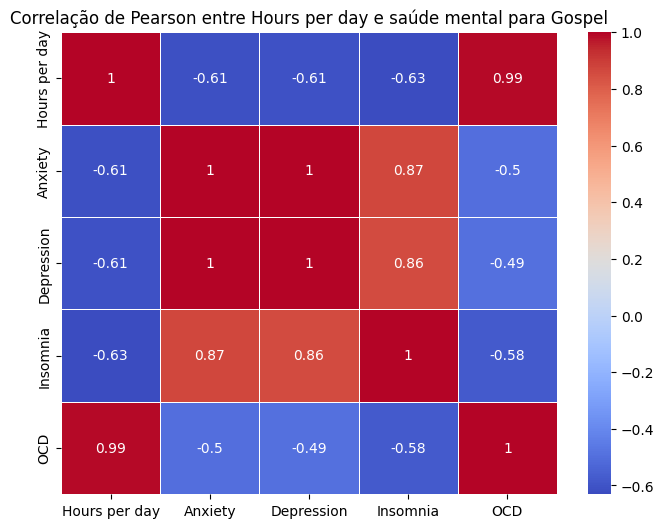

Correlação de Pearson para o gênero musical: Latin
               Hours per day  Anxiety  Depression  Insomnia  OCD
Hours per day            1.0     -1.0        -1.0       1.0  1.0
Anxiety                 -1.0      1.0         1.0      -1.0 -1.0
Depression              -1.0      1.0         1.0      -1.0 -1.0
Insomnia                 1.0     -1.0        -1.0       1.0  1.0
OCD                      1.0     -1.0        -1.0       1.0  1.0


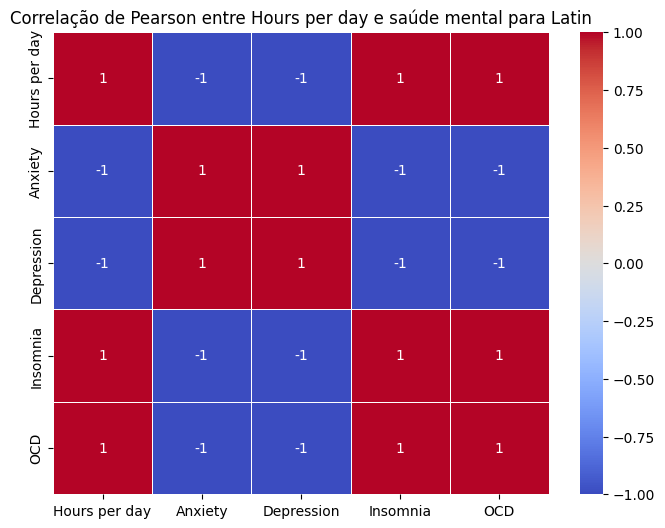

In [12]:
# Loop para calcular a correlação de Pearson por gênero musical
for genre in data['Fav genre'].unique():
    # Filtrando os dados para cada gênero musical
    genre_data = data[data['Fav genre'] == genre]
    
    # Calculando a correlação de Pearson para cada gênero musical
    genre_corr = genre_data[health_vars].corr(method='pearson')
    
    # Exibindo a matriz de correlação para cada gênero
    print(f"Correlação de Pearson para o gênero musical: {genre}")
    print(genre_corr)
    
    # Visualizando a correlação para o gênero com um heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(genre_corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlação de Pearson entre Hours per day e saúde mental para {genre}')
    plt.show()


Esse bloco exibe um gráfico de barras para a distribuição de gêneros musicais favoritos entre os participantes do estudo.

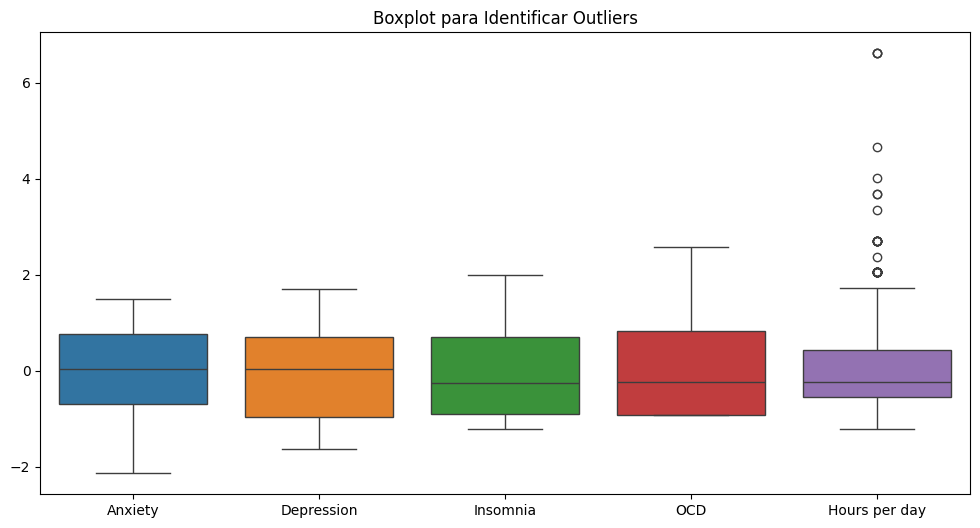

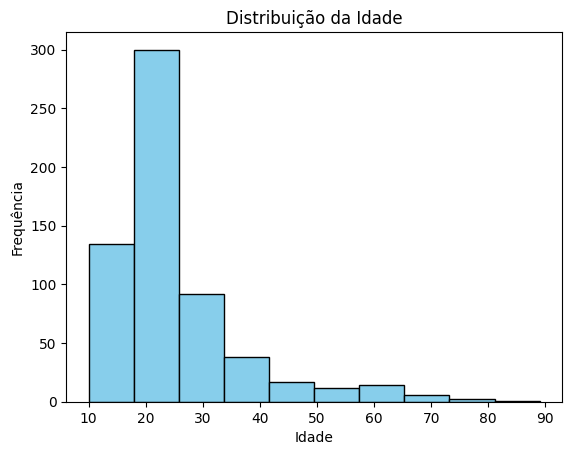

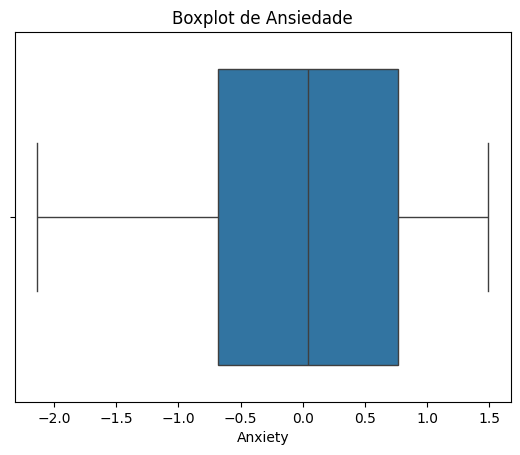

In [13]:
# Análise de Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Hours per day']])
plt.title('Boxplot para Identificar Outliers')
plt.show()

# Histograma para "Idade"
plt.hist(data['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Boxplot para "Anxiety"
sns.boxplot(x=data['Anxiety'])
plt.title('Boxplot de Ansiedade')
plt.show()

Esse bloco exibe gráficos para identificar outliers e analisar a distribuição de idade e ansiedade entre os participantes.

MSE: 0.8915287373304535
R²: -0.009148729036416059


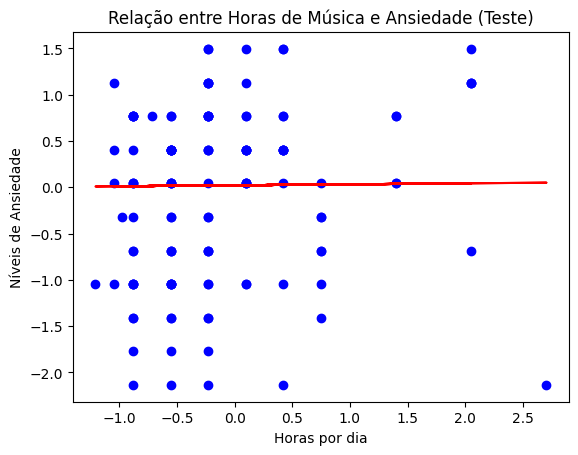

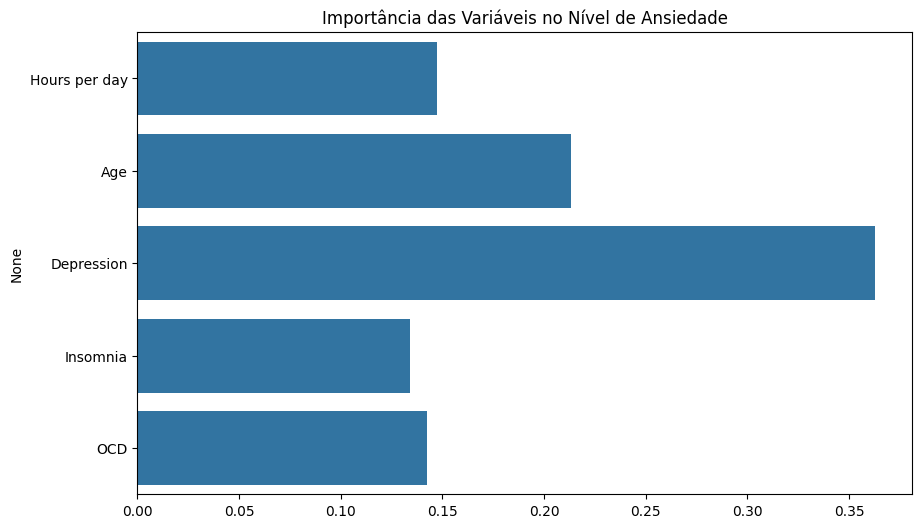

In [14]:
# Regressão Linear: Horas por dia vs Ansiedade
X = data[['Hours per day']].dropna()
y = data['Anxiety'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# Visualização da regressão
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Relação entre Horas de Música e Ansiedade (Teste)')
plt.xlabel('Horas por dia')
plt.ylabel('Níveis de Ansiedade')
plt.show()

# Importância das variáveis com Random Forest
X = data[['Hours per day', 'Age', 'Depression', 'Insomnia', 'OCD']]
y = data['Anxiety']

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)

importances = model_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Importância das Variáveis no Nível de Ansiedade')
plt.show()


A regressão linear é usada para prever os níveis de ansiedade com base nas horas de música ouvidas por dia, enquanto o modelo Random Forest mostra a importância de diferentes variáveis para a ansiedade.

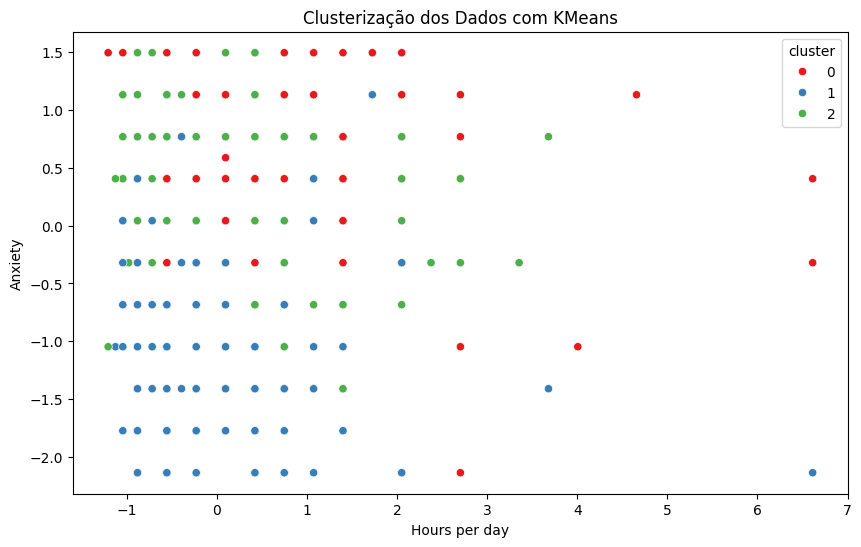

In [15]:
# Clusterização com KMeans
cluster_data = data[['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Hours per day']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(cluster_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours per day', y='Anxiety', hue='cluster', data=data, palette='Set1')
plt.title('Clusterização dos Dados com KMeans')
plt.show()


Esse bloco usa o algoritmo KMeans para criar clusters de pessoas com base em suas variáveis de saúde mental e horas de escuta de música, visualizando os resultados em um gráfico de dispersão.